<a href="https://colab.research.google.com/github/ToukirSabugar/LINEAR-REGRESSION-WITH-GD/blob/main/Linear_regre_with_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression part-2

In our earlier class, we have discussed about the cost function and its importance in linear regression. The objective in any regression method is to minimize the cost function. In our previous class, we did it manually. However, we need an optimization algorithm to do it automatically. The gradient descent algorithm is one of the best optimization method for linear regression problem. Here we will try to understand about this algorithm.

In [ ]:
import numpy as np
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import pylab as plb
from IPython.display import Image, display

As we discussed, we choose the sum of square error as a cost function for this problem. Here our objective is to find the minimum value of **C** by adjusting the parameter **a** and **b**. For simplicity let us consider **a = P1** and **b = P2**


In [ ]:
display(Math(r'C(P_1, P_2) =\frac 1{2m} \sum_{i=1}^m (H_i - Y_i)^2')) # cost function 

<IPython.core.display.Math object>

## Gradient descent:

# New Section

The equation of gradient descent is as given below

In [ ]:
display(Math(r'P_k = P_k -\alpha\frac{\partial }{\partial P_k}C(P_1,P_2) \ ( for \ k =1 \ and \ k =2)'))

<IPython.core.display.Math object>

In [ ]:
display(Math(r'P_k = P_k -\alpha\frac{\partial }{\partial P_k}C(P_1,P_2) \ ( for \ k =1 \ and \ k =2)'))

<IPython.core.display.Math object>

Where 

In [ ]:
display(Math(r'\frac{\partial }{\partial P_k}C(P_1,P_2) =\frac{\partial }{\partial P_k}\frac{1}{2m}\sum_{i =1}^{m}(P_2 + P_1X^i-Y^i)^2'))

<IPython.core.display.Math object>

In [ ]:
display(Math(r'for\ P_1:\ \frac{\partial }{\partial P_1}\frac{1}{2m}\sum_{i =1}^{m}(P_2 + P_1X^i-Y^i)^2 = \frac{1}{m}\sum_{i =1}^{m}(P_2 + P_1X^i-Y^i)X^i'))

<IPython.core.display.Math object>

In [ ]:
display(Math(r'for\ P_2:\ \frac{\partial }{\partial P_2}\frac{1}{2m}\sum_{i =1}^{m}(P_2 + P_1X^i-Y^i)^2 = \frac{1}{m}\sum_{i =1}^{m}(P_2 + P_1X^i-Y^i)'))

<IPython.core.display.Math object>

In linear regression, the gradient descent will always find a global minimum, since there are no local minima for linear regression. Here we will try to manually implement the gradient descent algorithm.

In [ ]:
def cost_f(X,Y,P): # X and Y are for the data and P is the parameters for the hypothesis.
    
    H = P[0]*X + P[1]
    
    C = (np.sum(np.square(H - Y)))/2*len(X)
    return C


In [ ]:
def g_d(alpha, X, Y, P, num_itr): # alpha=learning rate, num_itr = number of iteration, P = parameters of hypothesis
    cf = np.zeros((num_itr))
    pplt = np.zeros((2, num_itr))
    for i in range(num_itr):
        p1_new = P[0] - alpha*( np.sum( (P[0]*X + P[1] - Y)*X )  ) / len(X)
        p2_new = P[1] - alpha*( np.sum( (P[0]*X + P[1] - Y) )  ) / len(X)
        
        # Update of new parameters
        P[0] = p1_new
        P[1] = p2_new
        
        cf[i] = cost_f(X,Y,P)
        pplt[0,i] = P[0]
        
        pplt[1,i] = P[1]
    return P, pplt, cf
        

In [ ]:
P = [0.0, 0.0]
P = np.array(P)

In [ ]:
X = [1, 2, 3, 4, 5]
X = np.array(X)
#X = X/max(X)
Y = [10, 40, 50, 78, 83]
Y = np.array(Y)
#Y = Y/max(Y)

In [ ]:
itr = 100
alpha = 0.01

In [ ]:
PP, PPlt, CF = g_d(alpha, X, Y, P, itr) 

'''
PP stored the optimized parameters, 

PPlt stored all the values of parametres of each iteration

CF stored the cost fuction of each iteration

'''

'\nPP stored the optimized parameters, \n\nPPlt stored all the values of parametres of each iteration\n\nCF stored the cost fuction of each iteration\n\n'

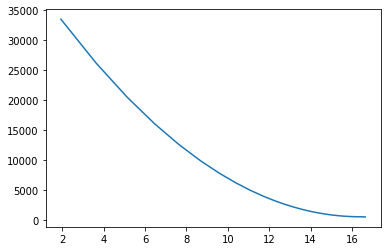

In [ ]:
plt.plot(PPlt[0,:],CF)

This is the surface plot of the P1, P2 and cost function. From this graph, it is clear that the optimum value of P1 =18 and P2 = -2.

In [ ]:
# Make data.
P1f = PP[0]
P2f = PP[1]

In [ ]:
P1f

16.64133019493385

In [ ]:
Hf = P1f*X + P2f 

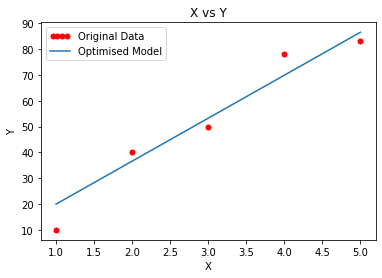

In [ ]:
line1, = plt.plot(X,Y, "ro", markersize=5, label='Original Data')
line2, = plt.plot(X,Hf, label='Optimised Model')
plt.title('X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
plt.show()

The above graph is the automatically optimised linear regression model. Next, we will implement the same in TensorFlow